In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve,auc
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow


In [4]:
dataset= pd.read_csv('C:\\Users\\Laptop\\Downloads\\diabetes.csv')

In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [7]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
dataset_copy=dataset.copy()

In [11]:
dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [12]:
dataset_copy.BMI.unique()

array([33.6, 38.2, 44.2, 42.3, 40.7, 46.5, 25.6, 26.1, 36.8, 33.5, 32.8,
       28.9,  0. , 26.6, 26. , 30.1, 25.1, 29.3, 25.2, 37.2, 39. , 33.3,
       37.3, 36.5, 28.6, 30.4, 25. , 29.7, 22.1, 24.2, 27.3, 31.6, 27.6,
       24. , 33.2, 32.9, 37.1, 34. , 40.2, 22.7, 45.4, 27.4, 42. , 28. ,
       39.1, 19.4, 24.4, 33.7, 34.7, 23. , 37.7, 46.8, 40.5, 41.5, 25.4,
       29. , 32.5, 42.7, 19.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4,
       24.6, 48.8, 32.4, 36.6, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4,
       28.7, 49.7, 22.5, 39.6, 29.5, 34.3, 37.4, 31.2, 30.5, 28.2, 23.2,
       53.2, 34.2, 26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8,
       36.9, 39.5, 21.9, 40.6, 47.9, 50. , 40.9, 29.9, 29.6, 31.9, 28.4,
       35.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 52.3,
       39.4, 24.3, 22.9, 34.8, 30.9, 31. , 40.1, 23.9, 37.5, 35.5, 42.8,
       42.6, 41.8, 35.8, 30. , 37.8, 34.6, 28.8, 23.6, 35.7, 36.7, 45.2,
       44. , 46.2, 35. , 43.6, 44.1, 18.4, 29.2, 27

In [13]:
dataset_copy.Pregnancies.unique()

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14],
      dtype=int64)

In [14]:
dataset_copy.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [15]:
dataset_copy.shape

(2000, 9)

In [16]:
dataset_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


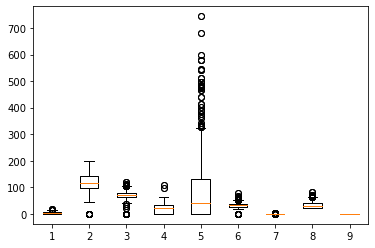

In [17]:
plt.boxplot(dataset_copy)
plt.show()

In [18]:
Q1 = dataset_copy.quantile(0.25)
Q1

Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

In [19]:
Q3 = dataset_copy.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                          16.000
Outcome                       1.000
dtype: float64


In [20]:
print((dataset_copy < (Q1 - 1.5 * IQR))  |(dataset_copy > (Q3 + 1.5 * IQR)))

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0           False    False          False          False    False  False   
1           False    False          False          False    False  False   
2           False    False           True          False    False  False   
3           False    False          False          False    False  False   
4           False    False          False          False     True  False   
...           ...      ...            ...            ...      ...    ...   
1995        False    False          False          False    False  False   
1996        False    False          False          False    False  False   
1997        False    False          False          False    False  False   
1998        False    False           True          False    False   True   
1999        False    False          False          False    False  False   

      DiabetesPedigreeFunction    Age  Outcome  
0                        False  False 

In [21]:
print(dataset_copy['DiabetesPedigreeFunction'].skew())
dataset_copy['DiabetesPedigreeFunction'].describe()

1.8119788941444446


count    2000.000000
mean        0.470930
std         0.323553
min         0.078000
25%         0.244000
50%         0.376000
75%         0.624000
max         2.420000
Name: DiabetesPedigreeFunction, dtype: float64

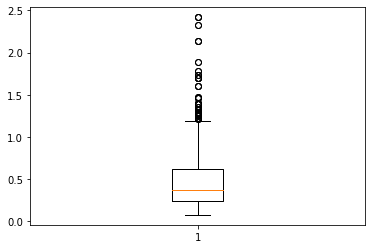

In [22]:
plt.boxplot(dataset_copy["DiabetesPedigreeFunction"])
plt.show()

<AxesSubplot:>

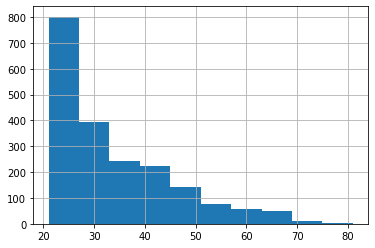

In [23]:
dataset_copy.Age.hist()

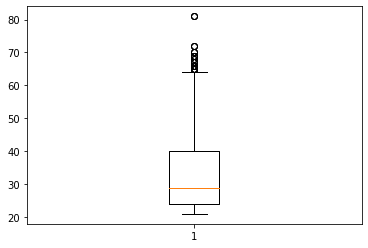

In [24]:
plt.boxplot(dataset_copy["Age"])
plt.show()

In [25]:
print(dataset_copy['Age'].quantile(0.10))
print(dataset_copy['Age'].quantile(0.90))

22.0
50.0


In [26]:
print(dataset_copy['Age'].skew())
Q1=dataset_copy['Age'].quantile(0.25)
Q3=dataset_copy['Age'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['Age'] = np.where(dataset_copy['Age'] <Min, 22.0,dataset_copy['Age'])
dataset_copy['Age'] = np.where(dataset_copy['Age'] >Max, 50.0,dataset_copy['Age'])
print(dataset_copy['Age'].skew())

1.1812672229549614
0.9065001103172357


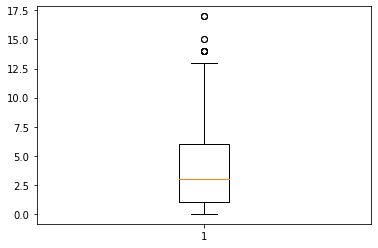

In [27]:
plt.boxplot(dataset_copy["Pregnancies"])
plt.show()

In [28]:
print(dataset_copy['Pregnancies'].quantile(0.10))
print(dataset_copy['Pregnancies'].quantile(0.90))

0.0
9.0


In [29]:
print(dataset_copy['Pregnancies'].skew())
Q1=dataset_copy['Pregnancies'].quantile(0.25)
Q3=dataset_copy['Pregnancies'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['Pregnancies'] = np.where(dataset_copy['Pregnancies'] <Min, 0.0,dataset_copy['Pregnancies'])
dataset_copy['Pregnancies'] = np.where(dataset_copy['Pregnancies'] >Max, 9.0,dataset_copy['Pregnancies'])
print(dataset_copy['Pregnancies'].skew())

0.9823655943266296
0.8637954310410373


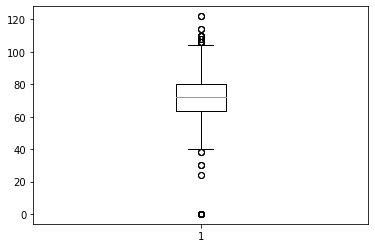

In [30]:
plt.boxplot(dataset_copy["BloodPressure"])
plt.show()

In [31]:
print(dataset_copy['BloodPressure'].quantile(0.10))
print(dataset_copy['BloodPressure'].quantile(0.90))

54.0
88.0


In [32]:
print(dataset_copy['BloodPressure'].skew())
Q1=dataset_copy['BloodPressure'].quantile(0.25)
Q3=dataset_copy['BloodPressure'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['BloodPressure'] = np.where(dataset_copy['BloodPressure'] <Min, 54.0,dataset_copy['BloodPressure'])
dataset_copy['BloodPressure'] = np.where(dataset_copy['BloodPressure'] >Max, 88.0,dataset_copy['BloodPressure'])
print(dataset_copy['BloodPressure'].skew())

-1.854476017469468
0.03955940343445571


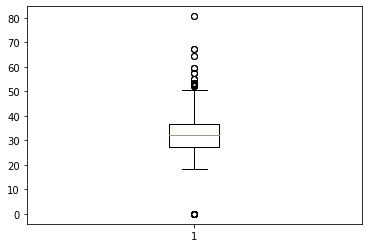

In [33]:
plt.boxplot(dataset_copy["BMI"])
plt.show()

In [34]:
print(dataset_copy['BMI'].quantile(0.10))
print(dataset_copy['BMI'].quantile(0.90))

23.7
42.1


In [35]:
print(dataset_copy['BMI'].skew())
Q1=dataset_copy['BMI'].quantile(0.25)
Q3=dataset_copy['BMI'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['BMI'] = np.where(dataset_copy['BMI'] <Min, 23.7,dataset_copy['BMI'])
dataset_copy['BMI'] = np.where(dataset_copy['BMI'] >Max, 42.1,dataset_copy['BMI'])
print(dataset_copy['BMI'].skew())

-0.09045533680555248
0.2616272208057226


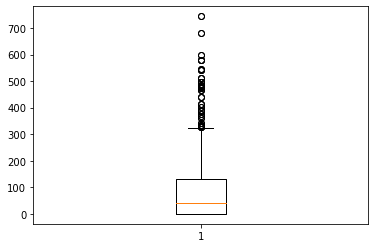

In [36]:
plt.boxplot(dataset_copy['Insulin'])
plt.show()

In [37]:
print(dataset_copy['Insulin'].quantile(0.10))
print(dataset_copy['Insulin'].quantile(0.90))

0.0
210.0


In [38]:
print(dataset_copy['Insulin'].skew())
Q1=dataset_copy['Insulin'].quantile(0.25)
Q3=dataset_copy['Insulin'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['Insulin'] = np.where(dataset_copy['Insulin'] <Min, 0.0,dataset_copy['Insulin'])
dataset_copy['Insulin'] = np.where(dataset_copy['Insulin'] >Max, 210.0,dataset_copy['Insulin'])
print(dataset_copy['Insulin'].skew())

1.9960843556489325
0.9390987636753445


In [39]:
dataset_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

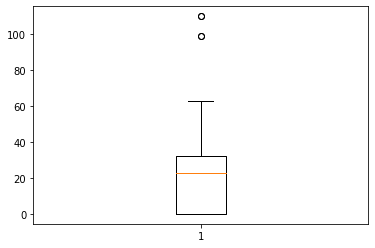

In [40]:
plt.boxplot(dataset_copy['SkinThickness'])
plt.show()

In [41]:
print(dataset_copy['SkinThickness'].quantile(0.10))
print(dataset_copy['SkinThickness'].quantile(0.90))

0.0
40.0


In [42]:
print(dataset_copy['SkinThickness'].skew())
Q1=dataset_copy['SkinThickness'].quantile(0.25)
Q3=dataset_copy['SkinThickness'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['SkinThickness'] = np.where(dataset_copy['SkinThickness'] <Min, 0.0,dataset_copy['SkinThickness'])
dataset_copy['SkinThickness'] = np.where(dataset_copy['SkinThickness'] >Max, 40.0,dataset_copy['SkinThickness'])
print(dataset_copy['SkinThickness'].skew())

0.2072281255594378
-0.05430300701069365


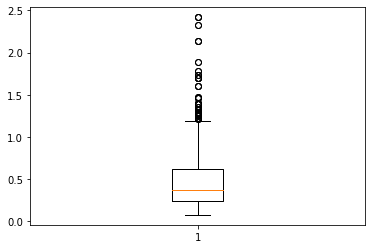

In [43]:
plt.boxplot(dataset_copy['DiabetesPedigreeFunction'])
plt.show()

In [44]:
print(dataset_copy['DiabetesPedigreeFunction'].quantile(0.10))
print(dataset_copy['DiabetesPedigreeFunction'].quantile(0.90))

0.164
0.8782000000000003


In [45]:
print(dataset_copy['DiabetesPedigreeFunction'].skew())
Q1=dataset_copy['DiabetesPedigreeFunction'].quantile(0.25)
Q3=dataset_copy['DiabetesPedigreeFunction'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['DiabetesPedigreeFunction'] = np.where(dataset_copy['DiabetesPedigreeFunction'] <Min, 0.165,dataset_copy['DiabetesPedigreeFunction'])
dataset_copy['DiabetesPedigreeFunction'] = np.where(dataset_copy['DiabetesPedigreeFunction'] >Max, 0.8782000000000003,dataset_copy['DiabetesPedigreeFunction'])
print(dataset_copy['DiabetesPedigreeFunction'].skew())

1.8119788941444446
0.8143904018124094


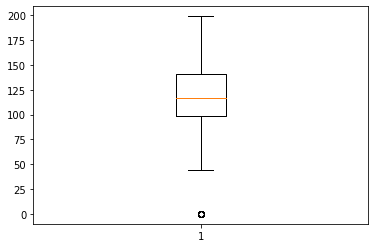

In [46]:
plt.boxplot(dataset_copy['Glucose'])
plt.show()

In [47]:
print(dataset_copy['Glucose'].quantile(0.10))
print(dataset_copy['Glucose'].quantile(0.90))

85.0
168.0


In [48]:
print(dataset_copy['Glucose'].skew())
Q1=dataset_copy['Glucose'].quantile(0.25)
Q3=dataset_copy['Glucose'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

dataset_copy['Glucose'] = np.where(dataset_copy['Glucose'] <Min, 85.0,dataset_copy['Glucose'])
dataset_copy['Glucose'] = np.where(dataset_copy['Glucose'] >Max, 168.0,dataset_copy['Glucose'])
print(dataset_copy['Glucose'].skew())

0.15880587249920794
0.5178972697747213


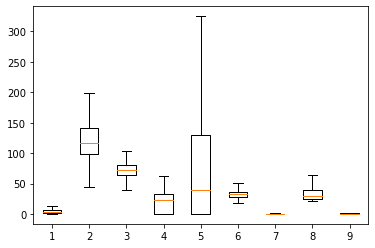

In [49]:
plt.boxplot(dataset_copy)
plt.show()

In [50]:
dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,138.0,62.0,35.0,0.0,33.6,0.127,47.0,1
1,0.0,84.0,82.0,31.0,125.0,38.2,0.233,23.0,0
2,0.0,145.0,54.0,0.0,0.0,44.2,0.630,31.0,1
3,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24.0,1
4,1.0,139.0,62.0,41.0,210.0,40.7,0.536,21.0,0


In [51]:
col_names = list(dataset_copy.columns)
mm_scaler = preprocessing.StandardScaler()
dataset_copy = mm_scaler.fit_transform(dataset_copy)
dataset_copy= pd.DataFrame(dataset_copy, columns=col_names)

In [52]:
dataset_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.519030,0.530327,-0.805536,0.905219,-0.835762,0.197539,-1.232292,1.333246,1.387075
1,-1.141369,-1.230365,0.914316,0.650120,0.634387,0.893605,-0.826613,-0.897506,-0.720942
2,-1.141369,0.758565,-1.493477,-1.326897,-0.835762,1.801517,0.692771,-0.153922,1.387075
3,-1.141369,0.432511,-0.289580,1.351642,2.104535,1.514011,-0.321427,-0.804558,1.387075
4,-0.830199,0.562932,-0.805536,1.287867,1.634088,1.271901,0.333017,-1.083402,-0.720942


In [53]:
dataset_copy.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [54]:
dataset_copy['Outcome'] = dataset_copy['Outcome'].astype(int)

In [55]:
dataset_copy.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,-0.519030,-1.523814,-0.633551,0.203697,-0.188896,-0.392604,-0.302291,0.031974,0
1996,1.347985,1.867149,0.054390,1.351642,0.693193,0.061352,1.033388,0.310818,1
1997,0.725647,-1.197760,0.570346,-1.326897,-0.835762,-0.165626,-0.256366,0.868506,0
1998,-1.141369,0.236878,1.430272,1.606741,0.693193,1.483747,-0.497477,-0.618662,1
1999,-0.519030,-1.328182,0.054390,-0.370276,0.058089,-0.332076,0.375116,-0.711610,0


Epoch 1/800

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

 1/40 [..............................] - ETA: 0s - loss: 0.2372 - accuracy: 0.6562
Epoch 00001: val_loss improved from inf to 0.21253, saving model to weights.h5
40/40 [==============================] - 0s 7ms/step - loss: 0.2188 - accuracy: 0.6586 - val_loss: 0.2125 - val_accuracy: 0.6594
Epoch 2/800
 1/40 [..............................] - ETA: 0s - loss: 0.2392 - accuracy: 0.5625
Epoch 00002: val_loss improved from 0.21253 to 0.20061, saving model to weights.h5
40/40 [====================

Epoch 27/800
 1/40 [..............................] - ETA: 0s - loss: 0.1400 - accuracy: 0.8438
Epoch 00027: val_loss did not improve from 0.18005
40/40 [==============================] - 0s 995us/step - loss: 0.1325 - accuracy: 0.8148 - val_loss: 0.1838 - val_accuracy: 0.7125
Epoch 28/800
 1/40 [..............................] - ETA: 0s - loss: 0.1283 - accuracy: 0.7812
Epoch 00028: val_loss improved from 0.18005 to 0.17878, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.8156 - val_loss: 0.1788 - val_accuracy: 0.7312
Epoch 29/800
 1/40 [..............................] - ETA: 0s - loss: 0.1223 - accuracy: 0.8438
Epoch 00029: val_loss improved from 0.17878 to 0.17749, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.8180 - val_loss: 0.1775 - val_accuracy: 0.7469
Epoch 30/800
 1/40 [..............................] - ETA: 0s - loss: 0.1431 - accuracy: 0.8125
Epoch 0003

Epoch 56/800
 1/40 [..............................] - ETA: 0s - loss: 0.0806 - accuracy: 0.9062
Epoch 00056: val_loss did not improve from 0.16438
40/40 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.8391 - val_loss: 0.1679 - val_accuracy: 0.7563
Epoch 57/800
 1/40 [..............................] - ETA: 0s - loss: 0.0623 - accuracy: 0.9062
Epoch 00057: val_loss improved from 0.16438 to 0.16408, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.8461 - val_loss: 0.1641 - val_accuracy: 0.7844
Epoch 58/800
 1/40 [..............................] - ETA: 0s - loss: 0.0779 - accuracy: 0.9062
Epoch 00058: val_loss did not improve from 0.16408
40/40 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.8367 - val_loss: 0.1738 - val_accuracy: 0.7312
Epoch 59/800
 1/40 [..............................] - ETA: 0s - loss: 0.0786 - accuracy: 0.9062
Epoch 00059: val_loss did not improve from 0

Epoch 85/800
 1/40 [..............................] - ETA: 0s - loss: 0.0824 - accuracy: 0.9062
Epoch 00085: val_loss improved from 0.15551 to 0.15532, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.8695 - val_loss: 0.1553 - val_accuracy: 0.7906
Epoch 86/800
 1/40 [..............................] - ETA: 0s - loss: 0.0418 - accuracy: 0.9688
Epoch 00086: val_loss improved from 0.15532 to 0.15272, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.8687 - val_loss: 0.1527 - val_accuracy: 0.8094
Epoch 87/800
 1/40 [..............................] - ETA: 0s - loss: 0.0687 - accuracy: 0.9062
Epoch 00087: val_loss did not improve from 0.15272
40/40 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.8687 - val_loss: 0.1565 - val_accuracy: 0.7844
Epoch 88/800
 1/40 [..............................] - ETA: 0s - loss: 0.0758 - accuracy: 0.9062
Epoch 00088:

Epoch 114/800
 1/40 [..............................] - ETA: 0s - loss: 0.1180 - accuracy: 0.8438
Epoch 00114: val_loss did not improve from 0.14405
40/40 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.8820 - val_loss: 0.1455 - val_accuracy: 0.8219
Epoch 115/800
 1/40 [..............................] - ETA: 0s - loss: 0.0883 - accuracy: 0.8750
Epoch 00115: val_loss did not improve from 0.14405
40/40 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.8820 - val_loss: 0.1441 - val_accuracy: 0.7969
Epoch 116/800
 1/40 [..............................] - ETA: 0s - loss: 0.0618 - accuracy: 0.9062
Epoch 00116: val_loss improved from 0.14405 to 0.14258, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.8867 - val_loss: 0.1426 - val_accuracy: 0.8188
Epoch 117/800
 1/40 [..............................] - ETA: 0s - loss: 0.0974 - accuracy: 0.8750
Epoch 00117: val_loss did not improve fr

Epoch 143/800
 1/40 [..............................] - ETA: 0s - loss: 0.0857 - accuracy: 0.9062
Epoch 00143: val_loss did not improve from 0.13622
40/40 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.8945 - val_loss: 0.1367 - val_accuracy: 0.8094
Epoch 144/800
 1/40 [..............................] - ETA: 0s - loss: 0.0686 - accuracy: 0.9062
Epoch 00144: val_loss did not improve from 0.13622
40/40 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.8945 - val_loss: 0.1385 - val_accuracy: 0.8094
Epoch 145/800
 1/40 [..............................] - ETA: 0s - loss: 0.0783 - accuracy: 0.8750
Epoch 00145: val_loss improved from 0.13622 to 0.13463, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9047 - val_loss: 0.1346 - val_accuracy: 0.8156
Epoch 146/800
 1/40 [..............................] - ETA: 0s - loss: 0.1053 - accuracy: 0.8750
Epoch 00146: val_loss did not improve fr

Epoch 172/800
 1/40 [..............................] - ETA: 0s - loss: 0.0631 - accuracy: 0.9375
Epoch 00172: val_loss did not improve from 0.12972
40/40 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9070 - val_loss: 0.1332 - val_accuracy: 0.8156
Epoch 173/800
 1/40 [..............................] - ETA: 0s - loss: 0.0417 - accuracy: 1.0000
Epoch 00173: val_loss did not improve from 0.12972
40/40 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9031 - val_loss: 0.1318 - val_accuracy: 0.8250
Epoch 174/800
 1/40 [..............................] - ETA: 0s - loss: 0.1136 - accuracy: 0.8438
Epoch 00174: val_loss did not improve from 0.12972
40/40 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9047 - val_loss: 0.1321 - val_accuracy: 0.8188
Epoch 175/800
 1/40 [..............................] - ETA: 0s - loss: 0.1351 - accuracy: 0.7812
Epoch 00175: val_loss did not improve from 0.12972
40/40 [==============

Epoch 201/800
 1/40 [..............................] - ETA: 0s - loss: 0.0369 - accuracy: 0.9375
Epoch 00201: val_loss did not improve from 0.12138
40/40 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9141 - val_loss: 0.1255 - val_accuracy: 0.8313
Epoch 202/800
 1/40 [..............................] - ETA: 0s - loss: 0.1006 - accuracy: 0.9062
Epoch 00202: val_loss improved from 0.12138 to 0.12105, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9234 - val_loss: 0.1210 - val_accuracy: 0.8406
Epoch 203/800
 1/40 [..............................] - ETA: 0s - loss: 0.0898 - accuracy: 0.8750
Epoch 00203: val_loss did not improve from 0.12105
40/40 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9117 - val_loss: 0.1215 - val_accuracy: 0.8375
Epoch 204/800
 1/40 [..............................] - ETA: 0s - loss: 0.1292 - accuracy: 0.8438
Epoch 00204: val_loss improved from 0.12

Epoch 230/800
 1/40 [..............................] - ETA: 0s - loss: 0.0508 - accuracy: 0.9688
Epoch 00230: val_loss did not improve from 0.11170
40/40 [==============================] - 0s 1ms/step - loss: 0.0568 - accuracy: 0.9359 - val_loss: 0.1136 - val_accuracy: 0.8687
Epoch 231/800
 1/40 [..............................] - ETA: 0s - loss: 0.0478 - accuracy: 0.9375
Epoch 00231: val_loss did not improve from 0.11170
40/40 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9391 - val_loss: 0.1118 - val_accuracy: 0.8656
Epoch 232/800
 1/40 [..............................] - ETA: 0s - loss: 0.0672 - accuracy: 0.9062
Epoch 00232: val_loss did not improve from 0.11170
40/40 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9328 - val_loss: 0.1127 - val_accuracy: 0.8594
Epoch 233/800
 1/40 [..............................] - ETA: 0s - loss: 0.0562 - accuracy: 0.9375
Epoch 00233: val_loss did not improve from 0.11170
40/40 [==============

Epoch 259/800
 1/40 [..............................] - ETA: 0s - loss: 0.1218 - accuracy: 0.9062
Epoch 00259: val_loss improved from 0.10606 to 0.10217, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9492 - val_loss: 0.1022 - val_accuracy: 0.8813
Epoch 260/800
 1/40 [..............................] - ETA: 0s - loss: 0.0259 - accuracy: 0.9688
Epoch 00260: val_loss did not improve from 0.10217
40/40 [==============================] - 0s 1ms/step - loss: 0.0476 - accuracy: 0.9516 - val_loss: 0.1052 - val_accuracy: 0.8844
Epoch 261/800
 1/40 [..............................] - ETA: 0s - loss: 0.0285 - accuracy: 0.9688
Epoch 00261: val_loss did not improve from 0.10217
40/40 [==============================] - 0s 1ms/step - loss: 0.0469 - accuracy: 0.9570 - val_loss: 0.1067 - val_accuracy: 0.8813
Epoch 262/800
 1/40 [..............................] - ETA: 0s - loss: 0.0135 - accuracy: 0.9688
Epoch 00262: val_loss did not improve fr

Epoch 288/800
 1/40 [..............................] - ETA: 0s - loss: 0.0110 - accuracy: 1.0000
Epoch 00288: val_loss did not improve from 0.09565
40/40 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 0.9641 - val_loss: 0.0966 - val_accuracy: 0.9000
Epoch 289/800
 1/40 [..............................] - ETA: 0s - loss: 0.0111 - accuracy: 1.0000
Epoch 00289: val_loss improved from 0.09565 to 0.09375, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9641 - val_loss: 0.0937 - val_accuracy: 0.9031
Epoch 290/800
 1/40 [..............................] - ETA: 0s - loss: 0.0146 - accuracy: 0.9688
Epoch 00290: val_loss did not improve from 0.09375
40/40 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9648 - val_loss: 0.0938 - val_accuracy: 0.9031
Epoch 291/800
 1/40 [..............................] - ETA: 0s - loss: 0.0782 - accuracy: 0.9375
Epoch 00291: val_loss improved from 0.09

Epoch 317/800
 1/40 [..............................] - ETA: 0s - loss: 0.0588 - accuracy: 0.9375
Epoch 00317: val_loss improved from 0.08570 to 0.08469, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9734 - val_loss: 0.0847 - val_accuracy: 0.9187
Epoch 318/800
 1/40 [..............................] - ETA: 0s - loss: 0.0375 - accuracy: 0.9688
Epoch 00318: val_loss did not improve from 0.08469
40/40 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9727 - val_loss: 0.0851 - val_accuracy: 0.9125
Epoch 319/800
 1/40 [..............................] - ETA: 0s - loss: 0.0170 - accuracy: 0.9688
Epoch 00319: val_loss did not improve from 0.08469
40/40 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9742 - val_loss: 0.0903 - val_accuracy: 0.9062
Epoch 320/800
 1/40 [..............................] - ETA: 0s - loss: 0.0240 - accuracy: 0.9688
Epoch 00320: val_loss did not improve fr

Epoch 346/800
 1/40 [..............................] - ETA: 0s - loss: 0.0355 - accuracy: 0.9688
Epoch 00346: val_loss did not improve from 0.07936
40/40 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9781 - val_loss: 0.0807 - val_accuracy: 0.9281
Epoch 347/800
 1/40 [..............................] - ETA: 0s - loss: 0.0339 - accuracy: 0.9688
Epoch 00347: val_loss did not improve from 0.07936
40/40 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9758 - val_loss: 0.0794 - val_accuracy: 0.9281
Epoch 348/800
 1/40 [..............................] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 00348: val_loss did not improve from 0.07936
40/40 [==============================] - 0s 1ms/step - loss: 0.0268 - accuracy: 0.9781 - val_loss: 0.0801 - val_accuracy: 0.9281
Epoch 349/800
 1/40 [..............................] - ETA: 0s - loss: 0.0660 - accuracy: 0.9375
Epoch 00349: val_loss did not improve from 0.07936
40/40 [==============

Epoch 375/800
 1/40 [..............................] - ETA: 0s - loss: 0.0887 - accuracy: 0.9062
Epoch 00375: val_loss did not improve from 0.07548
40/40 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9773 - val_loss: 0.0764 - val_accuracy: 0.9281
Epoch 376/800
 1/40 [..............................] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 00376: val_loss did not improve from 0.07548
40/40 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9797 - val_loss: 0.0756 - val_accuracy: 0.9281
Epoch 377/800
 1/40 [..............................] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 00377: val_loss improved from 0.07548 to 0.07541, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9805 - val_loss: 0.0754 - val_accuracy: 0.9281
Epoch 378/800
39/40 [============================>.] - ETA: 0s - loss: 0.0240 - accuracy: 0.9776
Epoch 00378: val_loss did not improve fr

Epoch 404/800
 1/40 [..............................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 00404: val_loss did not improve from 0.07361
40/40 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9789 - val_loss: 0.0746 - val_accuracy: 0.9281
Epoch 405/800
 1/40 [..............................] - ETA: 0s - loss: 0.0685 - accuracy: 0.9375
Epoch 00405: val_loss did not improve from 0.07361
40/40 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9773 - val_loss: 0.0746 - val_accuracy: 0.9281
Epoch 406/800
 1/40 [..............................] - ETA: 0s - loss: 0.0330 - accuracy: 0.9688
Epoch 00406: val_loss did not improve from 0.07361
40/40 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9789 - val_loss: 0.0738 - val_accuracy: 0.9281
Epoch 407/800
 1/40 [..............................] - ETA: 0s - loss: 6.0645e-04 - accuracy: 1.0000
Epoch 00407: val_loss did not improve from 0.07361
40/40 [==========

Epoch 433/800
 1/40 [..............................] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 00433: val_loss did not improve from 0.07018
40/40 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9797 - val_loss: 0.0713 - val_accuracy: 0.9312
Epoch 434/800
 1/40 [..............................] - ETA: 0s - loss: 7.3599e-04 - accuracy: 1.0000
Epoch 00434: val_loss did not improve from 0.07018
40/40 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9805 - val_loss: 0.0710 - val_accuracy: 0.9312
Epoch 435/800
 1/40 [..............................] - ETA: 0s - loss: 0.0642 - accuracy: 0.9375
Epoch 00435: val_loss did not improve from 0.07018
40/40 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9805 - val_loss: 0.0703 - val_accuracy: 0.9312
Epoch 436/800
 1/40 [..............................] - ETA: 0s - loss: 8.3972e-04 - accuracy: 1.0000
Epoch 00436: val_loss did not improve from 0.07018
40/40 [======

Epoch 462/800
 1/40 [..............................] - ETA: 0s - loss: 0.0323 - accuracy: 0.9688
Epoch 00462: val_loss improved from 0.06784 to 0.06784, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9797 - val_loss: 0.0678 - val_accuracy: 0.9344
Epoch 463/800
 1/40 [..............................] - ETA: 0s - loss: 5.1252e-04 - accuracy: 1.0000
Epoch 00463: val_loss improved from 0.06784 to 0.06723, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9789 - val_loss: 0.0672 - val_accuracy: 0.9344
Epoch 464/800
 1/40 [..............................] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 00464: val_loss improved from 0.06723 to 0.06691, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9812 - val_loss: 0.0669 - val_accuracy: 0.9344
Epoch 465/800
 1/40 [..............................] - ETA: 0s - loss

Epoch 491/800
 1/40 [..............................] - ETA: 0s - loss: 0.0325 - accuracy: 0.9688
Epoch 00491: val_loss did not improve from 0.06591
40/40 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9781 - val_loss: 0.0662 - val_accuracy: 0.9344
Epoch 492/800
 1/40 [..............................] - ETA: 0s - loss: 0.0647 - accuracy: 0.9375
Epoch 00492: val_loss did not improve from 0.06591
40/40 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9805 - val_loss: 0.0696 - val_accuracy: 0.9281
Epoch 493/800
 1/40 [..............................] - ETA: 0s - loss: 0.0329 - accuracy: 0.9688
Epoch 00493: val_loss did not improve from 0.06591
40/40 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9789 - val_loss: 0.0670 - val_accuracy: 0.9344
Epoch 494/800
 1/40 [..............................] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 00494: val_loss did not improve from 0.06591
40/40 [==============

 1/40 [..............................] - ETA: 0s - loss: 0.0314 - accuracy: 0.9688
Epoch 00549: val_loss did not improve from 0.06458
40/40 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9758 - val_loss: 0.0658 - val_accuracy: 0.9344
Epoch 550/800
 1/40 [..............................] - ETA: 0s - loss: 0.0145 - accuracy: 0.9688
Epoch 00550: val_loss did not improve from 0.06458
40/40 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9805 - val_loss: 0.0649 - val_accuracy: 0.9344
Epoch 551/800
 1/40 [..............................] - ETA: 0s - loss: 0.0315 - accuracy: 0.9688
Epoch 00551: val_loss did not improve from 0.06458
40/40 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9812 - val_loss: 0.0649 - val_accuracy: 0.9344
Epoch 552/800
 1/40 [..............................] - ETA: 0s - loss: 0.0317 - accuracy: 0.9688
Epoch 00552: val_loss did not improve from 0.06458
40/40 [============================

Epoch 578/800
 1/40 [..............................] - ETA: 0s - loss: 1.6896e-04 - accuracy: 1.0000
Epoch 00578: val_loss did not improve from 0.06350
40/40 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9820 - val_loss: 0.0638 - val_accuracy: 0.9344
Epoch 579/800
 1/40 [..............................] - ETA: 0s - loss: 0.0315 - accuracy: 0.9688
Epoch 00579: val_loss improved from 0.06350 to 0.06298, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9789 - val_loss: 0.0630 - val_accuracy: 0.9344
Epoch 580/800
 1/40 [..............................] - ETA: 0s - loss: 1.0542e-04 - accuracy: 1.0000
Epoch 00580: val_loss improved from 0.06298 to 0.06277, saving model to weights.h5
40/40 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9789 - val_loss: 0.0628 - val_accuracy: 0.9344
Epoch 581/800
 1/40 [..............................] - ETA: 0s - loss: 1.5542e-04 - accuracy: 1.0

Epoch 637/800
 1/40 [..............................] - ETA: 0s - loss: 0.0313 - accuracy: 0.9688
Epoch 00637: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9797 - val_loss: 0.0678 - val_accuracy: 0.9281
Epoch 638/800
 1/40 [..............................] - ETA: 0s - loss: 1.0158e-04 - accuracy: 1.0000
Epoch 00638: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9812 - val_loss: 0.0668 - val_accuracy: 0.9344
Epoch 639/800
 1/40 [..............................] - ETA: 0s - loss: 0.0332 - accuracy: 0.9688
Epoch 00639: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9789 - val_loss: 0.0690 - val_accuracy: 0.9281
Epoch 640/800
 1/40 [..............................] - ETA: 0s - loss: 3.9262e-04 - accuracy: 1.0000
Epoch 00640: val_loss did not improve from 0.06277
40/40 [======

Epoch 667/800
 1/40 [..............................] - ETA: 0s - loss: 0.0315 - accuracy: 0.9688
Epoch 00667: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.9820 - val_loss: 0.0655 - val_accuracy: 0.9344
Epoch 668/800
 1/40 [..............................] - ETA: 0s - loss: 1.6953e-04 - accuracy: 1.0000
Epoch 00668: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.9820 - val_loss: 0.0653 - val_accuracy: 0.9344
Epoch 669/800
 1/40 [..............................] - ETA: 0s - loss: 0.0314 - accuracy: 0.9688
Epoch 00669: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9797 - val_loss: 0.0661 - val_accuracy: 0.9344
Epoch 670/800
 1/40 [..............................] - ETA: 0s - loss: 2.2465e-05 - accuracy: 1.0000
Epoch 00670: val_loss did not improve from 0.06277
40/40 [======

Epoch 726/800
 1/40 [..............................] - ETA: 0s - loss: 1.2336e-04 - accuracy: 1.0000
Epoch 00726: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9781 - val_loss: 0.0673 - val_accuracy: 0.9344
Epoch 727/800
 1/40 [..............................] - ETA: 0s - loss: 0.0628 - accuracy: 0.9375
Epoch 00727: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9781 - val_loss: 0.0683 - val_accuracy: 0.9281
Epoch 728/800
 1/40 [..............................] - ETA: 0s - loss: 0.0317 - accuracy: 0.9688
Epoch 00728: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9805 - val_loss: 0.0684 - val_accuracy: 0.9281
Epoch 729/800
 1/40 [..............................] - ETA: 0s - loss: 0.0313 - accuracy: 0.9688
Epoch 00729: val_loss did not improve from 0.06277
40/40 [==========

Epoch 785/800
 1/40 [..............................] - ETA: 0s - loss: 6.1610e-04 - accuracy: 1.0000
Epoch 00785: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9812 - val_loss: 0.0665 - val_accuracy: 0.9344
Epoch 786/800
 1/40 [..............................] - ETA: 0s - loss: 0.0315 - accuracy: 0.9688
Epoch 00786: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9805 - val_loss: 0.0672 - val_accuracy: 0.9281
Epoch 787/800
 1/40 [..............................] - ETA: 0s - loss: 5.4356e-05 - accuracy: 1.0000
Epoch 00787: val_loss did not improve from 0.06277
40/40 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9805 - val_loss: 0.0669 - val_accuracy: 0.9281
Epoch 788/800
 1/40 [..............................] - ETA: 0s - loss: 0.0939 - accuracy: 0.9062
Epoch 00788: val_loss did not improve from 0.06277
40/40 [======

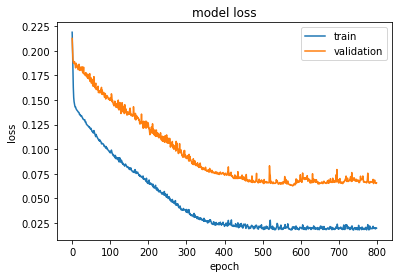

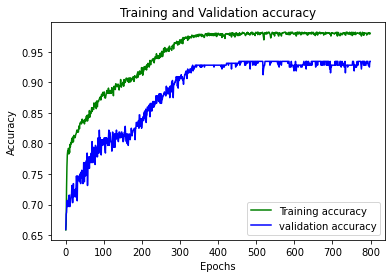

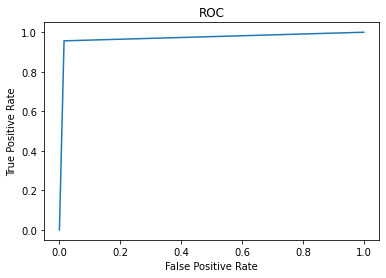

<AxesSubplot:title={'center':'Confusion matrix'}>

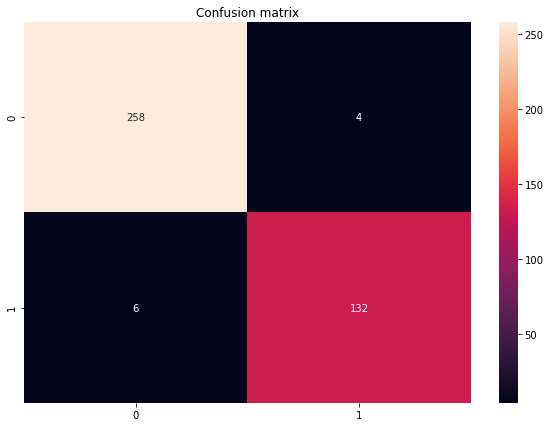

In [54]:
#Building ANN MODEL
 
#split data    
X_train=dataset_copy.iloc[0:1600:,0:8];
Y_train=dataset_copy.iloc[0:1600,8];

X_test=dataset_copy.iloc[1600::,0:8];
Y_test=dataset_copy.iloc[1600:,8];
#categorical
nb_classes=2
y_train=to_categorical(Y_train,nb_classes)
y_test=to_categorical(Y_test,nb_classes)

#adding hidden layers
model = Sequential()
model.add(Dense(16, activation='linear'))
model.add(Dropout(0.001))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(2, activation='softmax'))

# # # Configure a model for mean-squared error regression.
model.compile(loss='mse', optimizer='adam' ,metrics=['accuracy'])

checkpoint =tensorflow.keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)

# # # Train the model
history = model.fit(X_train, y_train, epochs=800, verbose=1, validation_split=0.2, callbacks=[checkpoint])
model.summary()

# # # Evaluate
score=model.evaluate(X_test, y_test)
print("total score :",score[0])
print(model.metrics_names)
print("accu",score[1])
x=model.predict(X_test).argmax(axis=1)

#loss curve
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#traning curve
TrainAcc = history.history['accuracy']
valAcc = history.history['val_accuracy']
plt.plot(TrainAcc, 'g', label='Training accuracy')
plt.plot(valAcc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(Y_test, x)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# confusion matrix curve
confusion = metrics.confusion_matrix(y_true = Y_test, y_pred=x)
df_cm = pd.DataFrame(confusion, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
plt.title("Confusion matrix")
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
sns.heatmap(df_cm, annot=True,fmt='d')
